<a href="https://colab.research.google.com/github/Bunny825/transfer_learning_normal_vgg16/blob/main/transfer_learning_normall_vv16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: baladityasaichinni
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:49<00:00, 22.9MB/s]


In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.applications.vgg16 import VGG16

train_ds=keras.utils.image_dataset_from_directory("/content/dogs-vs-cats/train",labels="inferred",label_mode="int",batch_size=32,image_size=(150,150))

test_ds=keras.utils.image_dataset_from_directory("/content/dogs-vs-cats/test",labels="inferred",label_mode="int",batch_size=32,image_size=(150,150))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
conv_base=VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))
model=Sequential()
conv_base.trainable=False
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

history=model.fit(train_ds,validation_data=test_ds,epochs=10)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 105ms/step - accuracy: 0.9008 - loss: 1.4712 - val_accuracy: 0.9520 - val_loss: 0.1445
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 88ms/step - accuracy: 0.9683 - loss: 0.0915 - val_accuracy: 0.9510 - val_loss: 0.1615
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 104ms/step - accuracy: 0.9835 - loss: 0.0495 - val_accuracy: 0.9534 - val_loss: 0.1823
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 88ms/step - accuracy: 0.9893 - loss: 0.0342 - val_accuracy: 0.9482 - val_loss: 0.2740
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.9707 - loss: 0.1238 - val_accuracy: 0.9480 - val_loss: 0.2945
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.9845 - loss: 0.0489 - val_accuracy: 0.9502 - val_loss: 0.2859
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.9906 - loss: 0.0328 - val_accuracy: 0.9538 - val_loss: 0.2433
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 88ms/step - accuracy: 0.9946 - loss: 0.02

In [10]:
score=model.evaluate(test_ds)
print(score[1])

157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.9569 - loss: 0.2660
0.9521999955177307


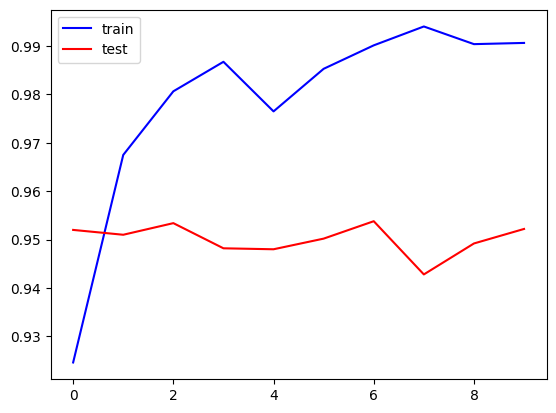

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="blue",label="train")
plt.plot(history.history["val_accuracy"],color="red",label="test")
plt.legend()
plt.show()

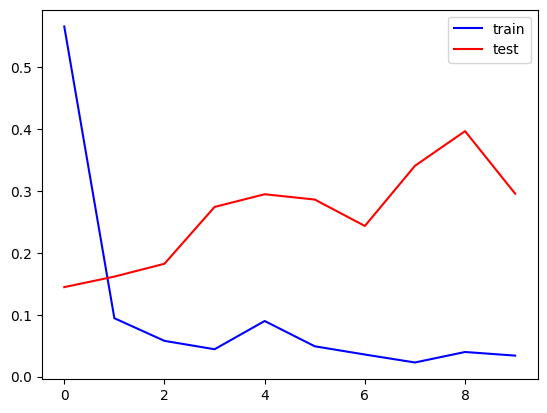

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color="blue",label="train")
plt.plot(history.history["val_loss"],color="red",label="test")
plt.legend()
plt.show()